# Name: Ajit A Gouda

# Batch:DS2311

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.model_selection import GridSearchCV

In [5]:
df=pd.read_csv('census.csv')

In [6]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df.shape

(32560, 15)

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


An exploration of the dataset reveals the following distributional characteristics of several features:

- Age: The age range spans from a minimum of 19 years to a maximum of 90 years, with an average age of 37 years.
- Education: Years of education range from 1 year to a maximum of 16 years, while the average individual has 10 years of education. It is worth noting (or "A potential data quality issue" can be used if you suspect an error) that the maximum value seems unusually high.
- Capital Gain: Capital gain values vary considerably, with a minimum and average of 0, but a maximum outlier of 99999. This outlier suggests a possible error in data collection.
- Work Hours: The number of hours worked per week falls between 1 and 99 hours, with an average of 40 hours.

## Start Exploring categorial features with Enlisting Value counts & Sub-categories

In [10]:
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Workclass
Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 others               1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
Education
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64
Marital_status
Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64
Occupation
Occupa

## Exploratory Data Analysis

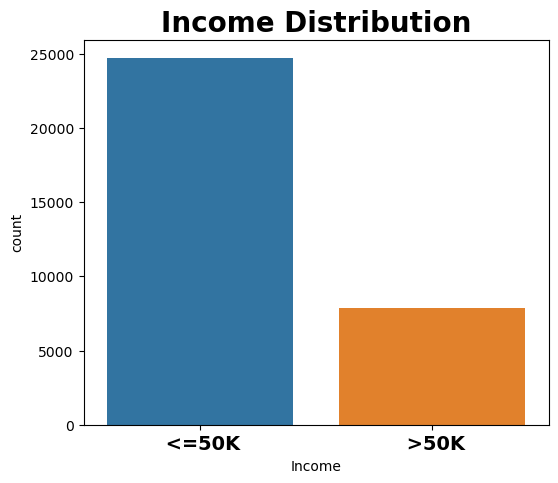

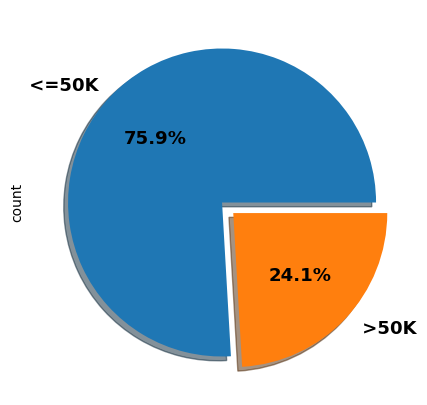

In [11]:
plt.figure(figsize=(6,5))
sns.countplot(x='Income',data=df)
plt.xticks(fontsize=14,fontweight ='bold')
plt.title('Income Distribution',fontsize=20,fontweight='bold')

plt.figure(figsize=(6,5))
df['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)
plt.show()

#### The target variable, income, exhibits a class imbalance.  Approximately 75.9% of the population (24,697 individuals) have an income below 50K. This imbalance is an important consideration when undertaking the task of income prediction

In [12]:
print('Minimum Age:', df['Age'].min(),'years')
print('Maximum Age:', df['Age'].max(),'years')
print('Average Age:', df['Age'].mean(),'years')

Minimum Age: 17 years
Maximum Age: 90 years
Average Age: 38.581633906633904 years


#### Developing a function to generate new columns for categorizing individuals based on age groups.

In [13]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if (18 < x < 31):
        return "19-30"
    if (30 < x < 41) :
        return '31-40'
    if (40 < x <51):
        return '41-50'
    if (50 < x < 61):
        return "51-60"
    if (60 < x < 71):
        return "61-70"
    else :
        return 'Greater Than 70'

In [14]:
df['age_group']=df['Age'].apply(age_group)

In [15]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,19-30
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,31-40


Text(0.5, 1.0, 'Income Distribution')

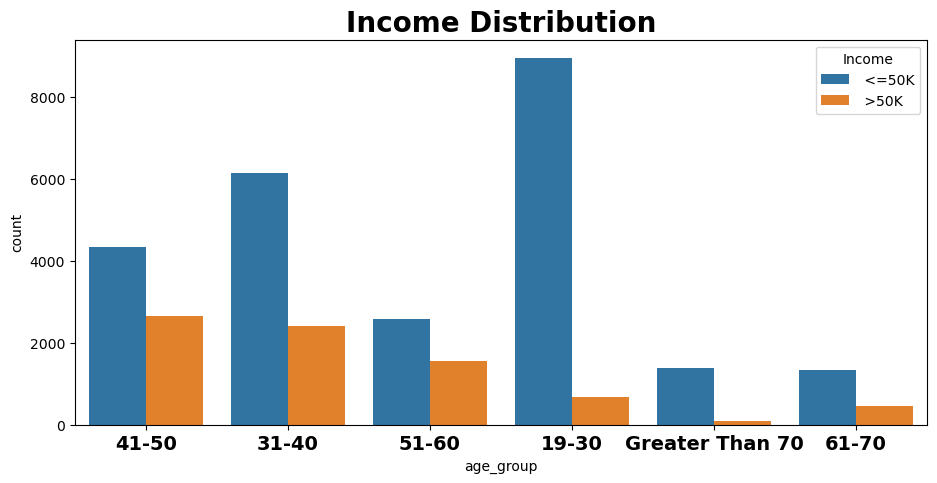

In [16]:
plt.figure(figsize=(11,5))
sns.countplot(x='age_group',hue=df['Income'],data=df)
plt.xticks(fontsize=14,fontweight ='bold')
plt.title('Income Distribution',fontsize=20,fontweight='bold')

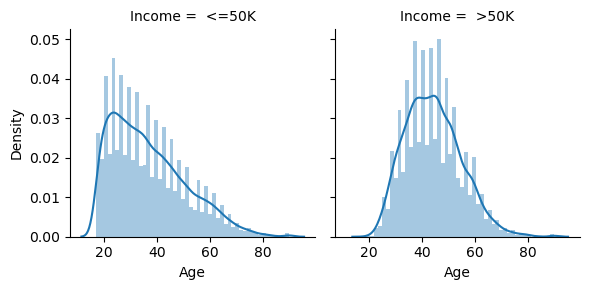

In [17]:
ax= sns.FacetGrid(df,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

An interesting insight emerges from the analysis of income distribution across age groups. While only 24% of the population earns more than  50K, the distribution within this group is not uniform. The age group of 19-30 years old has a relatively high proportion (almost 10%) earning above 50K. This percentage steadily declines for older individuals, with the exception of a possible outlier group – those above 70 years old who might have established successful retirement plans. Notably, the peak earners (above $50K) are concentrated in the age groups of 41-50 and 51-60 years old. Further investigation into the professions associated with this higher income bracket within these specific age groups would be a valuable next step.

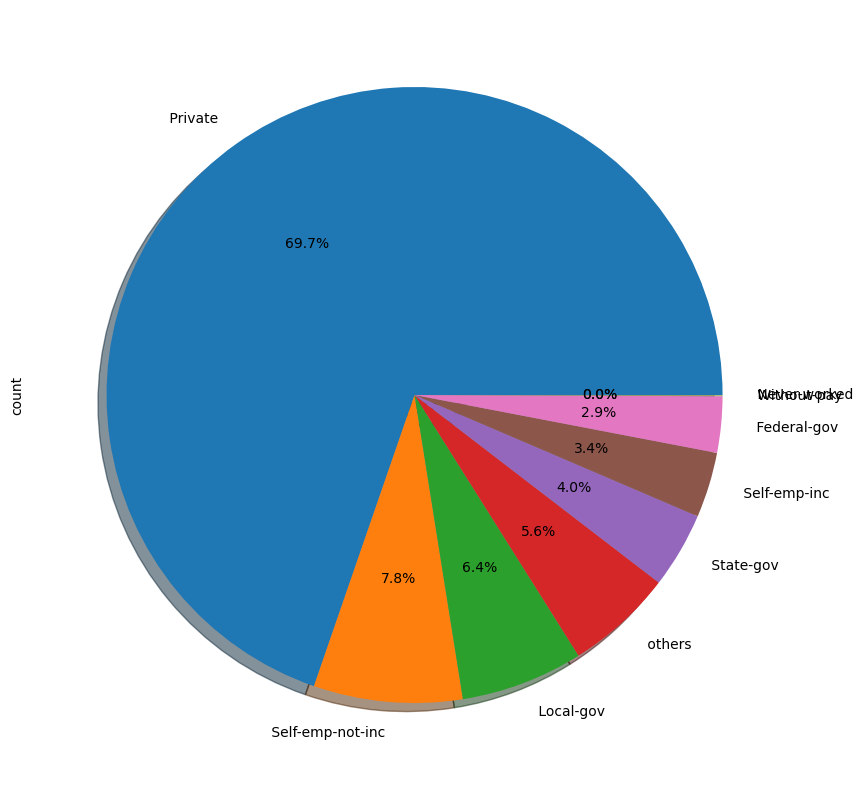

In [18]:
plt.figure(figsize=(10,10))
df['Workclass'].value_counts().plot.pie(autopct='%2.1f%%',shadow=True)
plt.show()

Text(0.5, 1.0, 'Income Distribution')

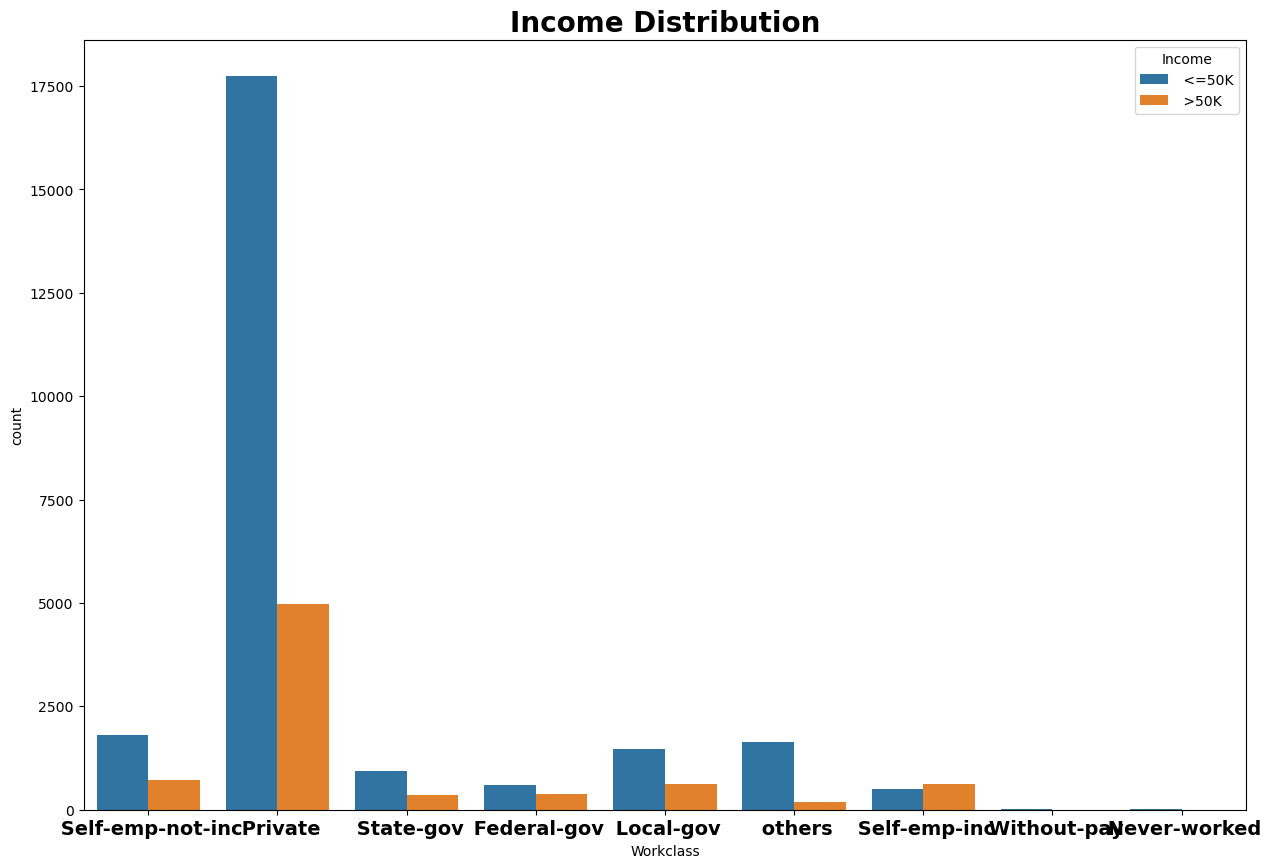

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(x='Workclass',hue=df['Income'],data=df)
plt.xticks(fontsize=14,fontweight ='bold')
plt.title('Income Distribution',fontsize=20,fontweight='bold')

In [20]:
pd.crosstab(df['Income'],df["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,others,All
Income,,,,,,,,,,
<=50K,589,1476,7,17733,494,1817,944,14,1645,24719
>50K,371,617,0,4963,622,724,353,0,191,7841
All,960,2093,7,22696,1116,2541,1297,14,1836,32560


Analysis of employment sector shows private sector dominance (75.3%). Interestingly, self-employed incorporated individuals have a higher proportion earning >50K compared to private sector (<25%). Government jobs (federal & state) display a near-equal income split, suggesting a potentially uniform structure. Minorities exist for those who haven't worked or are working without pay (students/unemployed).

Text(0.5, 1.0, 'Income Distribution as per Education')

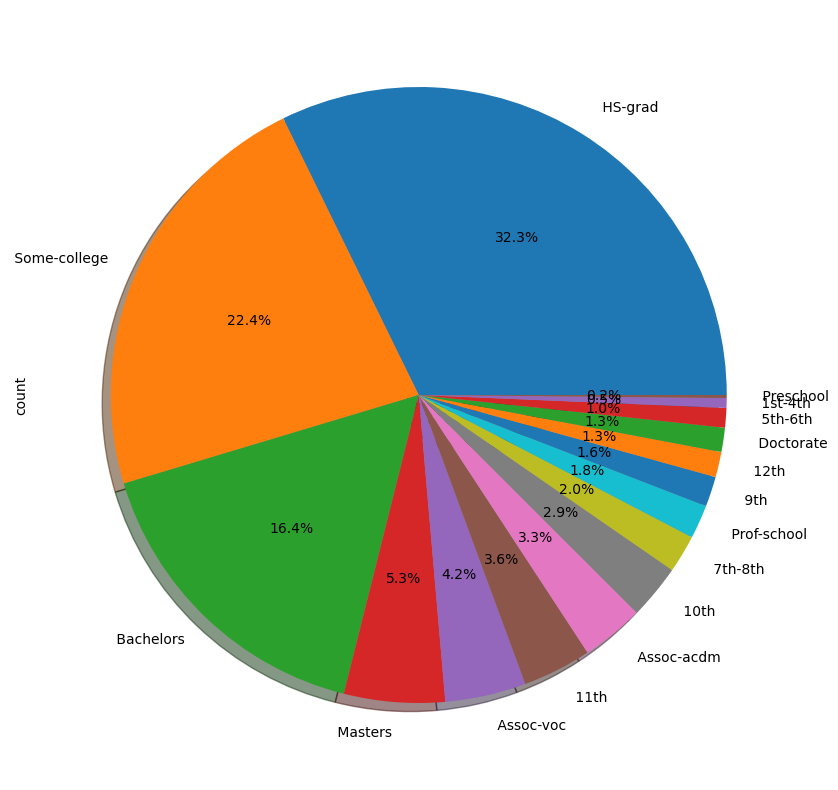

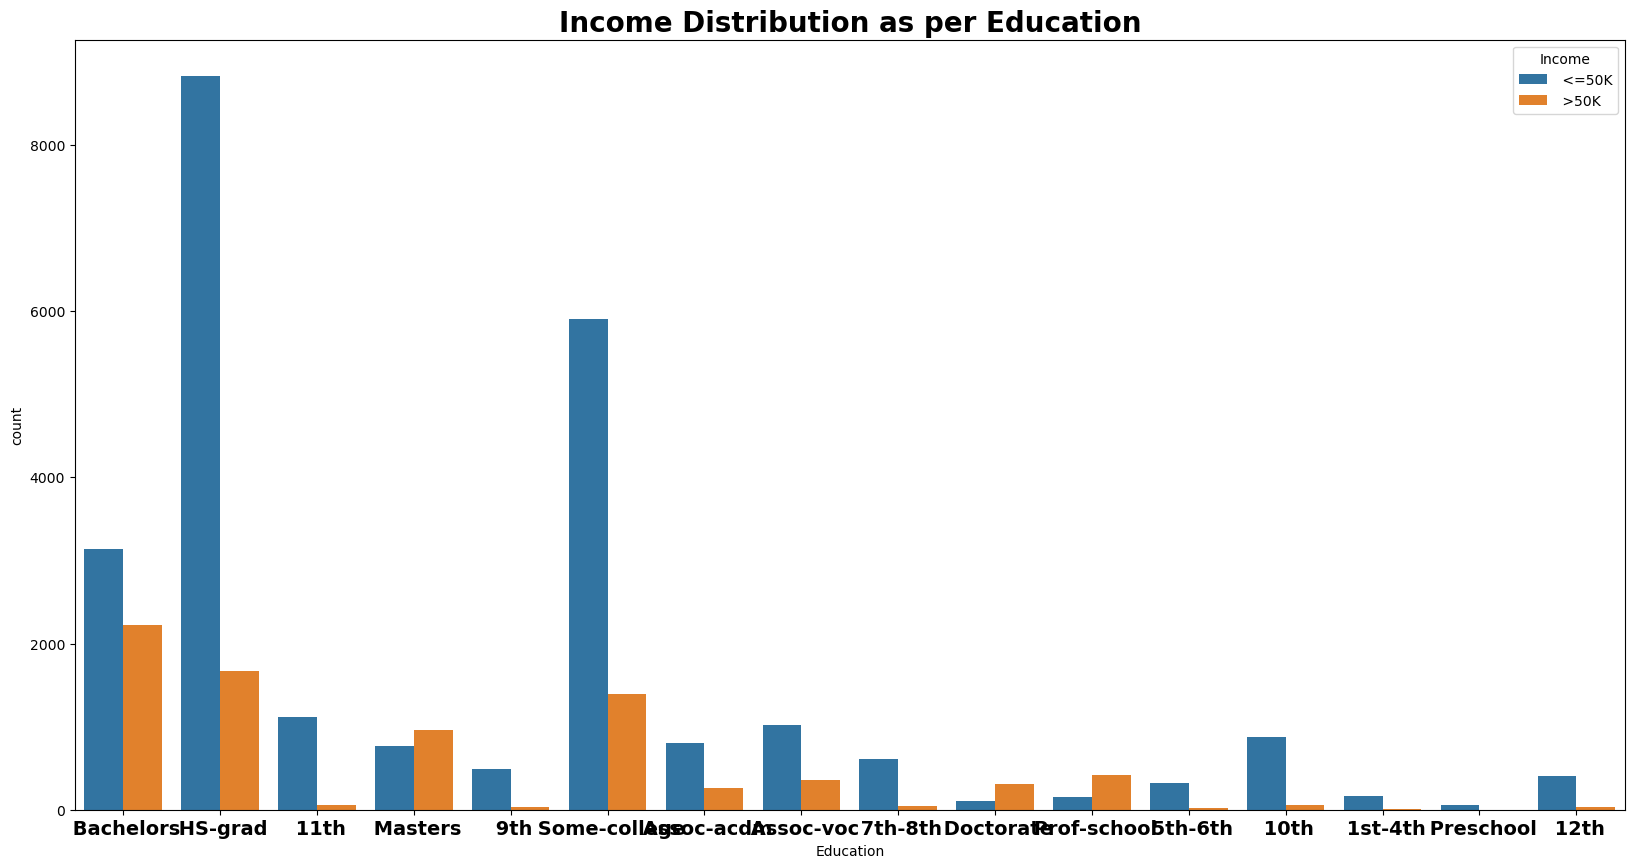

In [21]:
plt.figure(figsize=(10,10))
df['Education'].value_counts().plot.pie(autopct='%2.1f%%',shadow=True)

plt.figure(figsize=(20,10))
sns.countplot(x='Education',hue=df['Income'],data=df)
plt.xticks(fontsize=14,fontweight ='bold')
plt.title('Income Distribution as per Education',fontsize=20,fontweight='bold')

- High school graduation is the most common education level (32.3%).
- Lower education ties to lower income (below 12th grade rarely earns >$50K).
- Interesting trend: Masters, Doctorate, and Prof-School degrees show more people earning >50K than below, suggesting a benefit for advanced degrees.
- This trend weakens for Associate's degrees (academic/vocational).

In [22]:
pd.crosstab(df['Education'],df["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,others,All
Education,,,,,,,,,,
10th,6,31,2,695,19,67,13,0,100,933
11th,9,36,1,923,14,60,14,0,118,1175
12th,5,19,0,333,7,19,10,0,40,433
1st-4th,0,4,0,136,2,13,1,0,12,168
5th-6th,1,9,0,266,4,19,4,0,30,333
7th-8th,2,28,1,424,14,94,10,1,72,646
9th,3,23,0,387,10,34,6,0,51,514
Assoc-acdm,55,88,0,729,35,71,41,1,47,1067
Assoc-voc,38,86,0,1005,38,108,46,0,61,1382


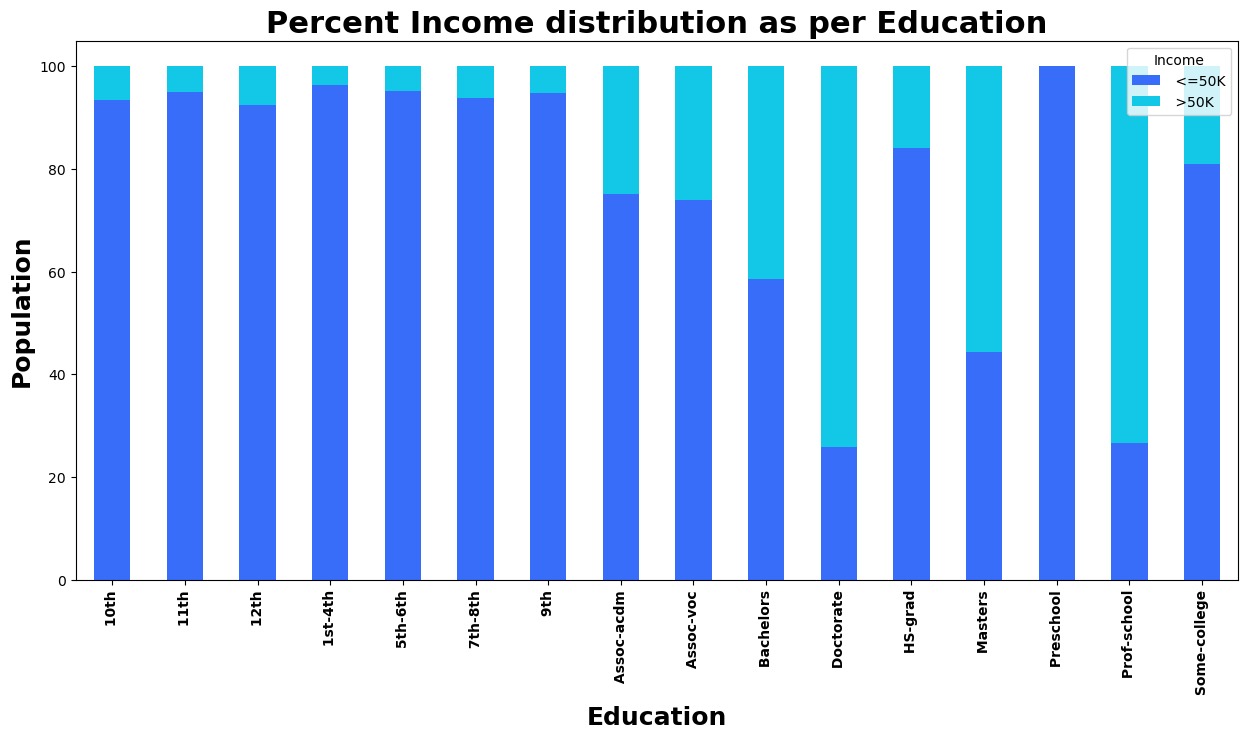

In [23]:
sns.set_palette('rainbow')
table = pd.crosstab(df['Education'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xlabel('Education', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

- Analysis of education and income shows a strong correlation: Doctorate degrees lead to the highest income (75% > 50K), followed by professional degrees. This suggests Masters or Doctorate degrees can significantly increase earning potential.
- Examining employment by education level reveals the private sector as the primary employer for High School Graduates (8,300+). While the private sector also recruits highly educated individuals, local government becomes another key employer for these groups.

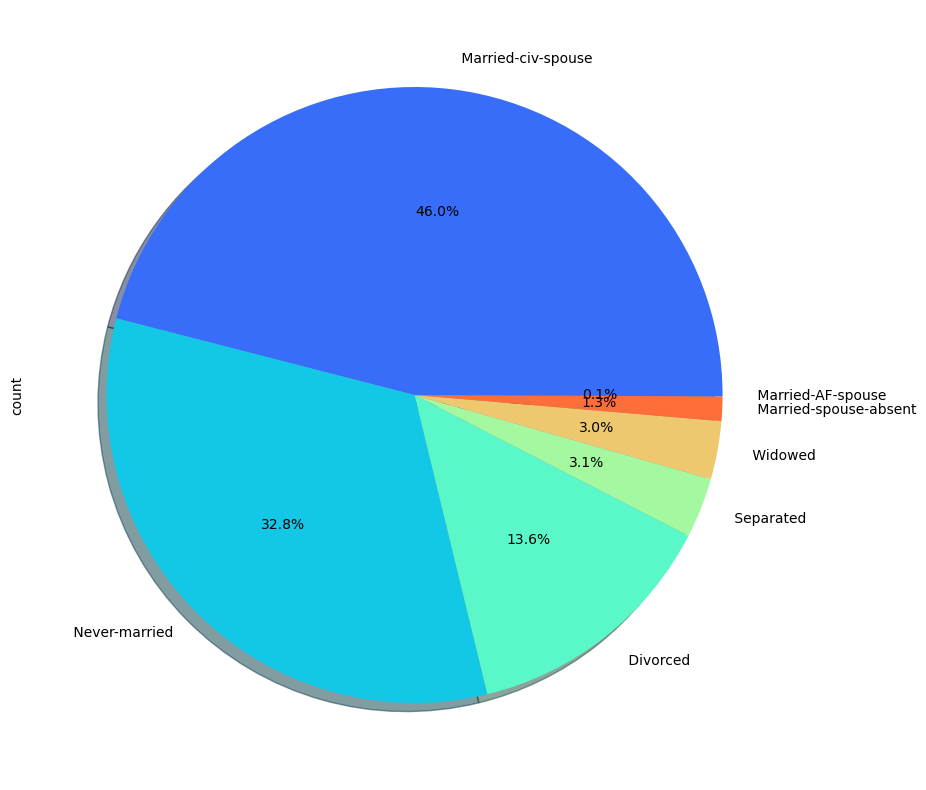

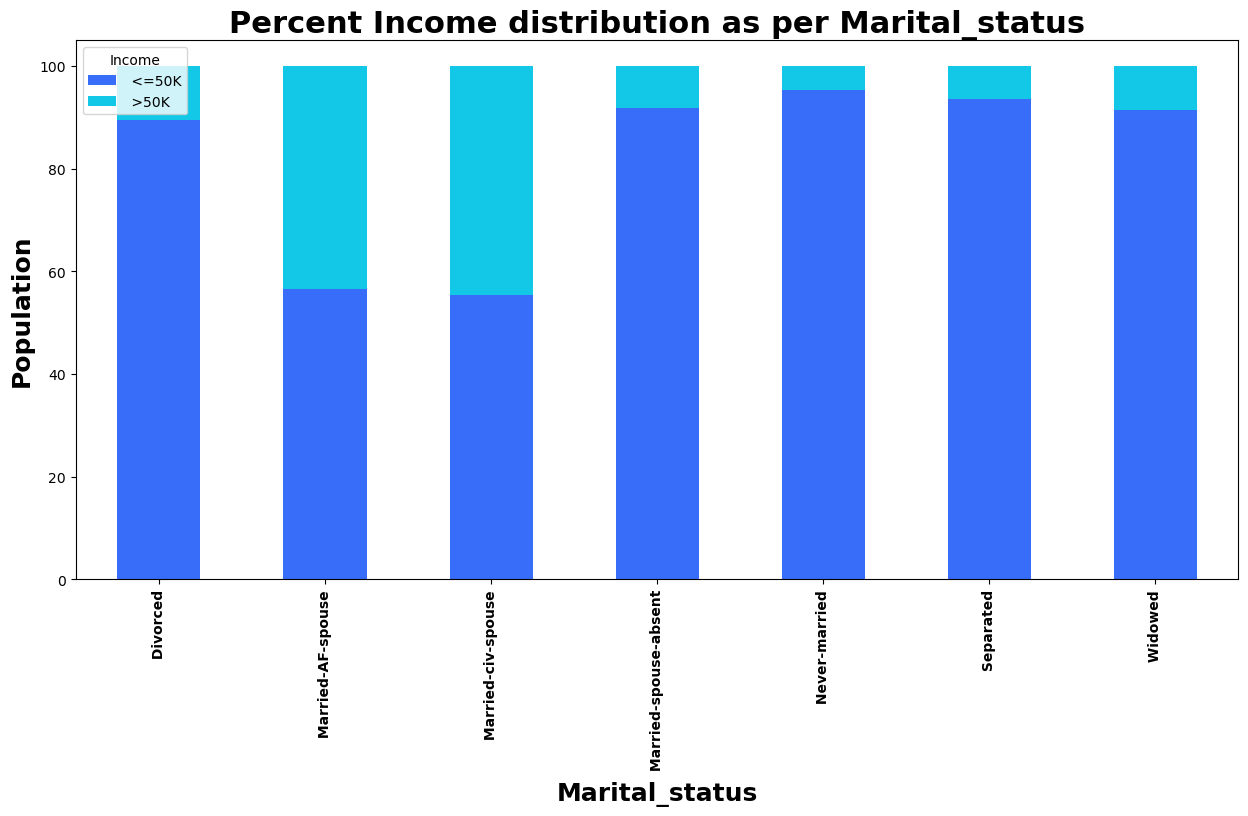

In [24]:
plt.figure(figsize=(10,10))
df['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%',shadow=True)

sns.set_palette('rainbow')
table = pd.crosstab(df['Marital_status'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Marital_status', fontsize=22, fontweight='bold')
plt.xlabel('Marital_status', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

In [25]:
pd.crosstab(df['Marital_status'],df["Income"], margins=True).style.background_gradient(cmap='summer_r')

Income,<=50K,>50K,All
Marital_status,,,
Divorced,3980,463,4443
Married-AF-spouse,13,10,23
Married-civ-spouse,8284,6692,14976
Married-spouse-absent,384,34,418
Never-married,10191,491,10682
Separated,959,66,1025
Widowed,908,85,993
All,24719,7841,32560


#### Analysis of marital status and income reveals married individuals are most likely to earn >50K (potentially due to emotional support and stability). Notably, only the "Married-Civilian Spouse" category has a balanced income distribution, with all others having <25% earning >50K.

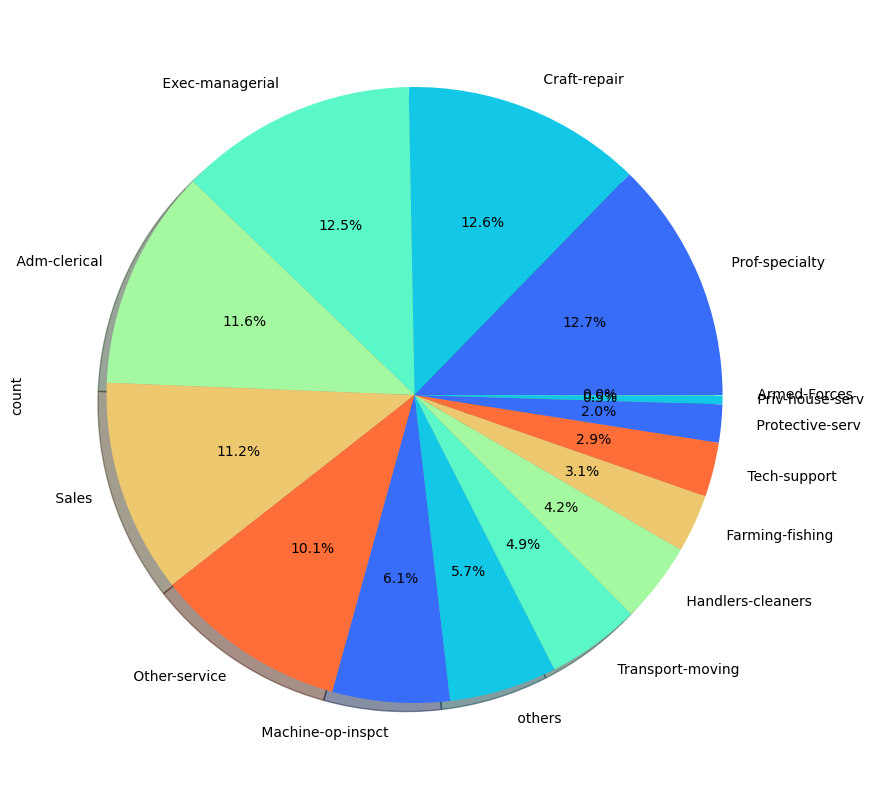

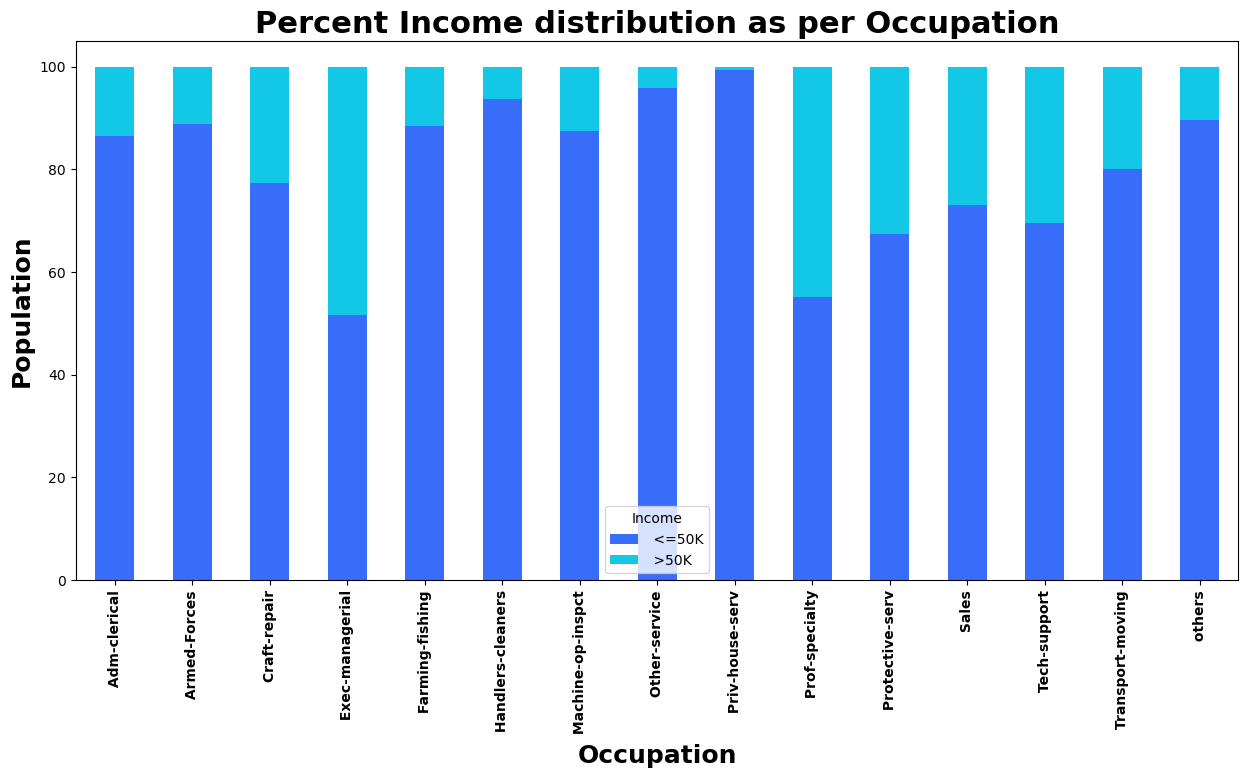

In [26]:
plt.figure(figsize=(10,10))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%',shadow=True)

sns.set_palette('rainbow')
table = pd.crosstab(df['Occupation'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Occupation', fontsize=22, fontweight='bold')
plt.xlabel('Occupation', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

In [27]:
pd.crosstab(df['Occupation'],df["Income"], margins=True).style.background_gradient(cmap='winter_r')

Income,<=50K,>50K,All
Occupation,,,
Adm-clerical,3262,507,3769
Armed-Forces,8,1,9
Craft-repair,3170,929,4099
Exec-managerial,2098,1968,4066
Farming-fishing,879,115,994
Handlers-cleaners,1284,86,1370
Machine-op-inspct,1752,250,2002
Other-service,3158,137,3295
Priv-house-serv,148,1,149


Examining the distribution of individuals earning above 50K annually across professions reveals Prof-Specialty positions (2,049 people) and Executive/Managerial positions (1,968 people) as the top categories. However, when considering the likelihood of exceeding this income threshold, Executive/Managerial roles take the lead with a 50% chance. Prof-Specialty positions follow with a 33% probability. Conversely, Private Household Service occupations offer the lowest chance of earning above 50K, with a mere 1 in 147 individuals exceeding this mark.

In [28]:
pd.crosstab(df['Occupation'],df["Workclass"], margins=True).style.background_gradient(cmap='winter_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,others,All
Occupation,,,,,,,,,,
Adm-clerical,317,283,0,2833,31,50,252,3,0,3769
Armed-Forces,9,0,0,0,0,0,0,0,0,9
Craft-repair,64,146,0,3195,106,531,56,1,0,4099
Exec-managerial,180,214,0,2691,400,392,189,0,0,4066
Farming-fishing,8,29,0,455,51,430,15,6,0,994
Handlers-cleaners,23,47,0,1273,2,15,9,1,0,1370
Machine-op-inspct,14,12,0,1913,13,36,13,1,0,2002
Other-service,35,193,0,2740,27,175,124,1,0,3295
Priv-house-serv,0,0,0,149,0,0,0,0,0,149


A noteworthy observation emerges from the analysis of professions within non-working categories.  Seven individuals classified as "Never Worked" surprisingly hold Prof-Specialty positions.  Similarly, six individuals from the "Without Pay" workclass belong to the Executive/Managerial category.  It's possible these individuals might be engaged in unpaid internship programs that align with these high-earning professions.

Text(0.5, 1.0, 'Income Distribution as per Relationship')

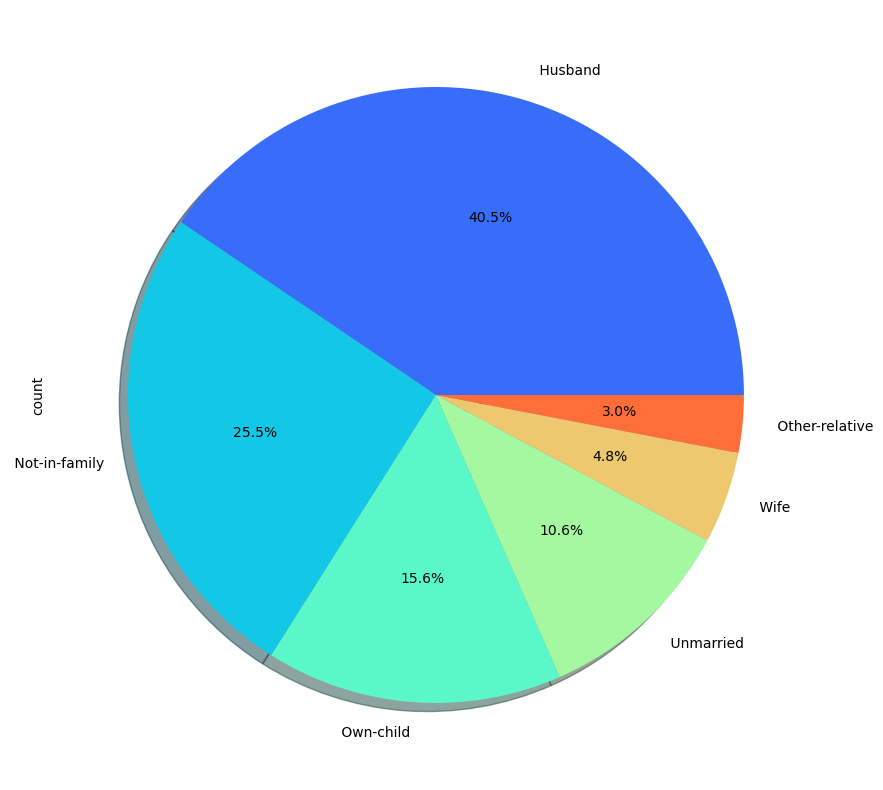

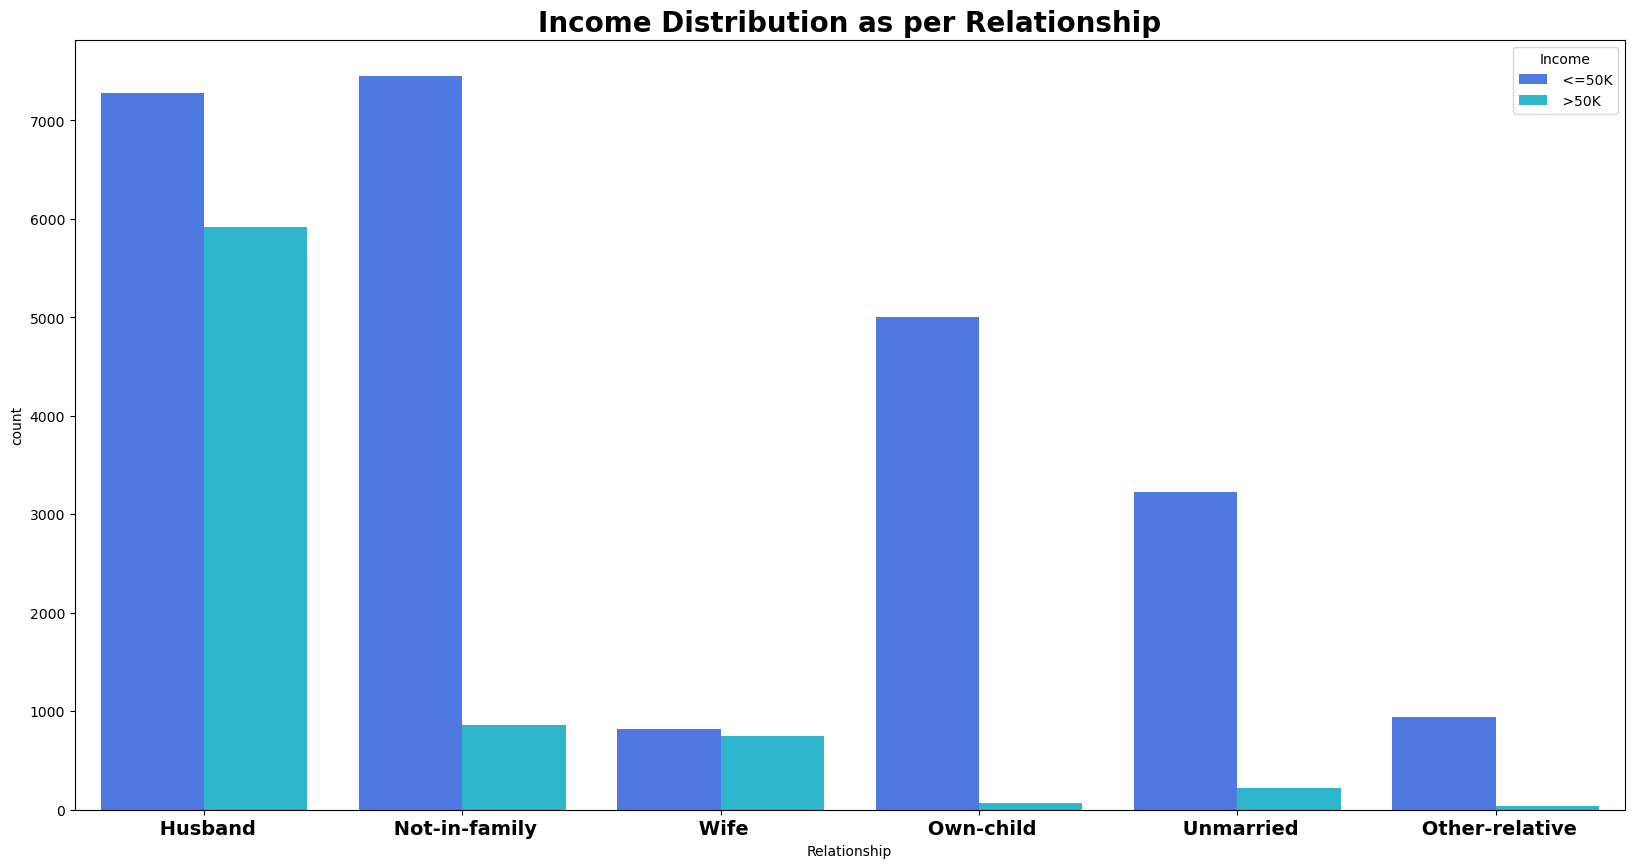

In [29]:
plt.figure(figsize=(10,10))
df['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',shadow=True)

plt.figure(figsize=(20,10))
sns.countplot(x='Relationship',hue=df['Income'],data=df)
plt.xticks(fontsize=14,fontweight ='bold')
plt.title('Income Distribution as per Relationship',fontsize=20,fontweight='bold')

- Analysis of income reveals wives have a similar chance as husbands of earning >50K (though slightly lower for husbands).
- Unmarried individuals are significantly less likely to earn >50K compared to married couples.

Text(0.5, 1.0, 'Income Distribution as per Race')

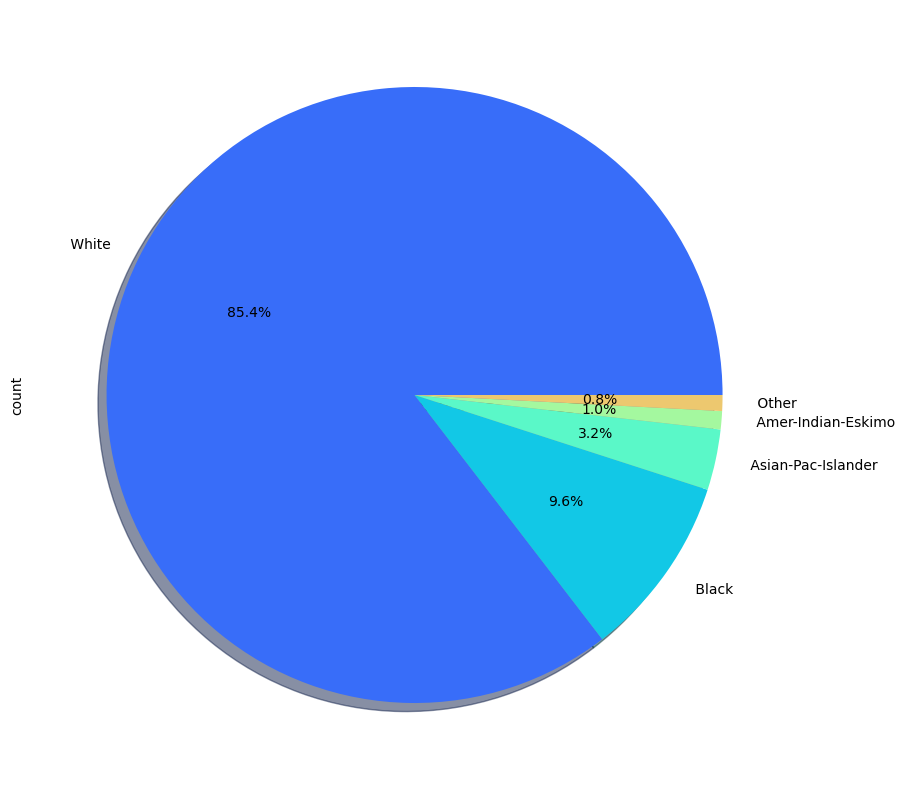

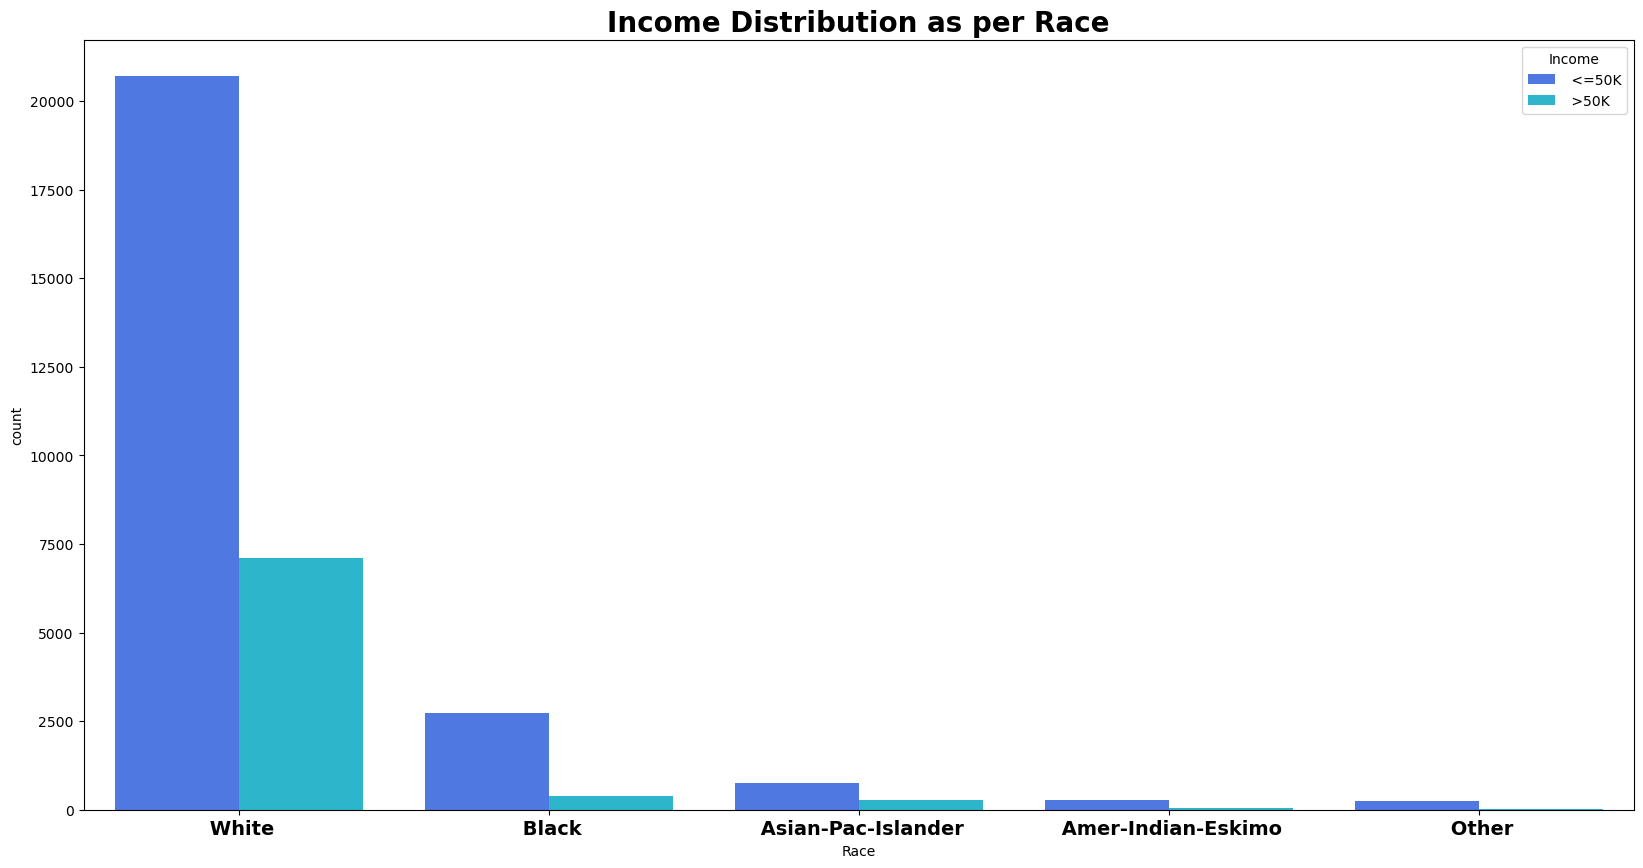

In [30]:
plt.figure(figsize=(10,10))
df['Race'].value_counts().plot.pie(autopct='%2.1f%%',shadow=True)

plt.figure(figsize=(20,10))
sns.countplot(x='Race',hue=df['Income'],data=df)
plt.xticks(fontsize=14,fontweight ='bold')
plt.title('Income Distribution as per Race',fontsize=20,fontweight='bold')

#### The data shows a racial imbalance (85.4% White, 9.6% Black). While most high-income earners are White, limited representation of other races (less than 5%) makes income distribution conclusions unreliable.

Text(0.5, 1.0, 'Income Distribution as per Race')

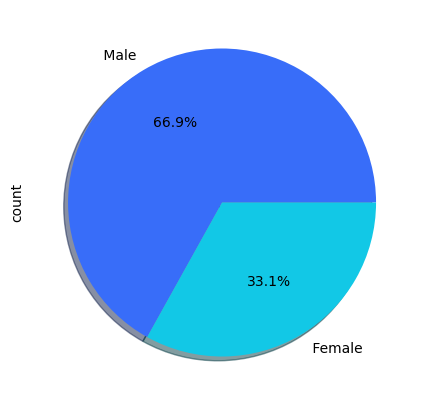

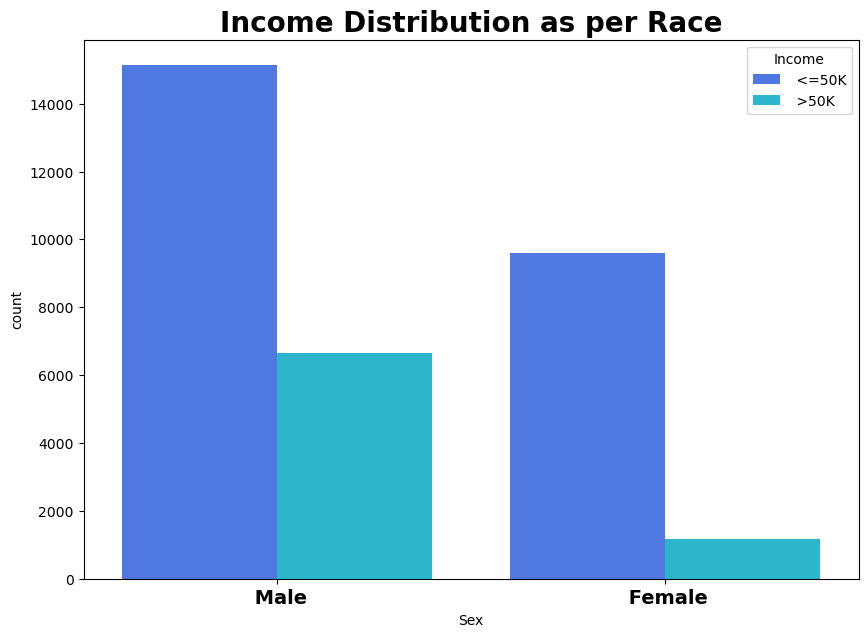

In [31]:
plt.figure(figsize=(6,5))
df['Sex'].value_counts().plot.pie(autopct='%2.1f%%',shadow=True)

plt.figure(figsize=(10,7))
sns.countplot(x='Sex',hue=df['Income'],data=df)
plt.xticks(fontsize=14,fontweight ='bold')
plt.title('Income Distribution as per Race',fontsize=20,fontweight='bold')

The analysis reveals a concerning gender disparity in income distribution.  Fewer than 10% of women fall within the category exceeding 50K annually.  Conversely, approximately 33% of men earn more than this threshold.  This substantial gap highlights the need for further investigation into the potential causes of this income inequality.

In [32]:
pd.crosstab(df['Occupation'],[df.Sex,df.Income], margins=True).style.background_gradient(cmap='winter_r')

The analysis reveals a gender composition of approximately 33% females within the population.  Within this demographic, a concentration of females is observed in Administrative/Clerical, Other Services, and Prof-Specialty occupations.  Interestingly, mirroring the distribution for males, the highest proportion of females earning above 50K annually comes from the Prof-Specialty and Executive/Managerial categories.

This chart depicts the relationship between educational attainment and work hours per week.

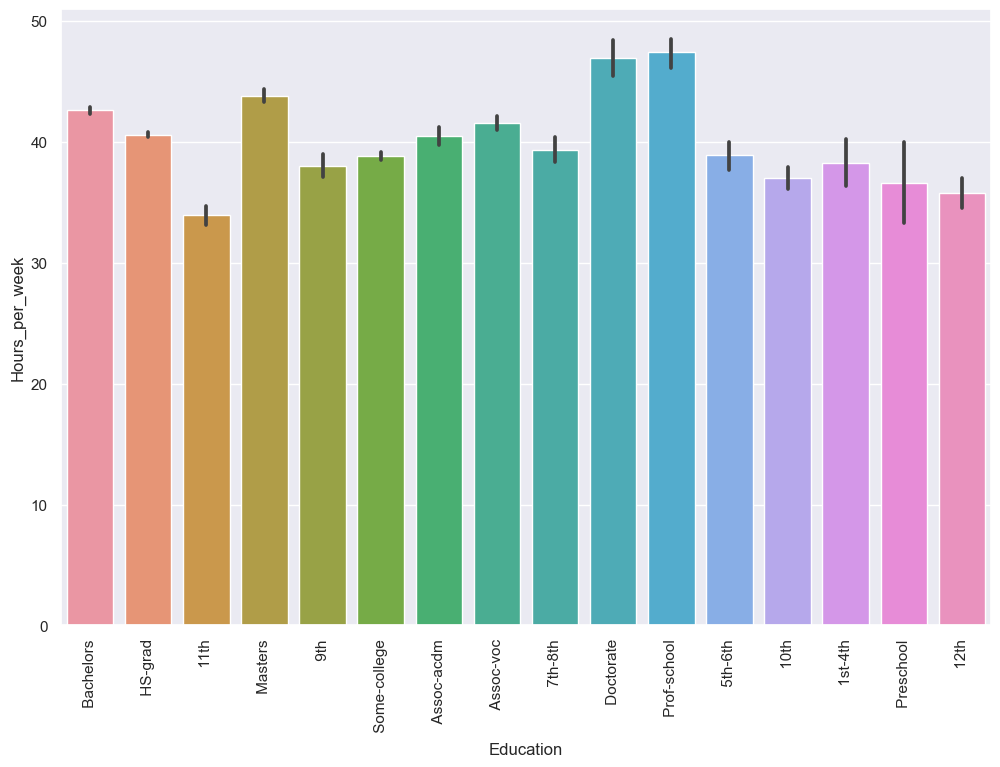

In [33]:
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df['Education'], y = df['Hours_per_week'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=90)
plt.show()

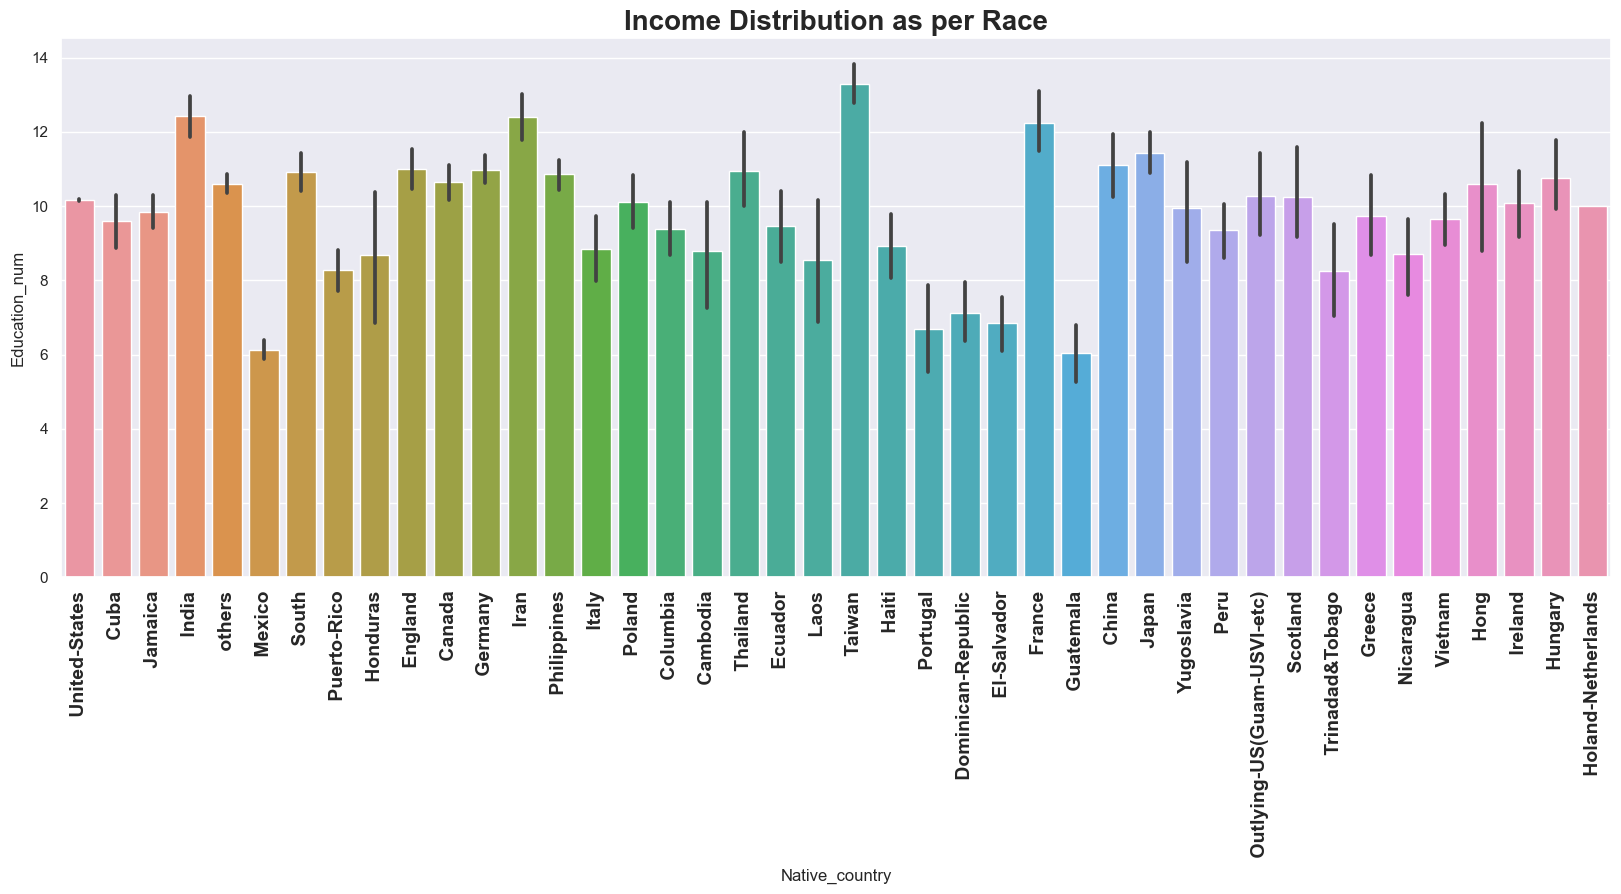

In [34]:
plt.figure(figsize=(20,7))
sns.barplot(x='Native_country',y='Education_num',data=df)
plt.xticks(fontsize=14,fontweight ='bold')
plt.title('Income Distribution as per Race',fontsize=20,fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## Encoding categorical data

In [35]:
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income','age_group']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,2
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,1
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,3
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,1


## 1. Outliers Detection and Removal

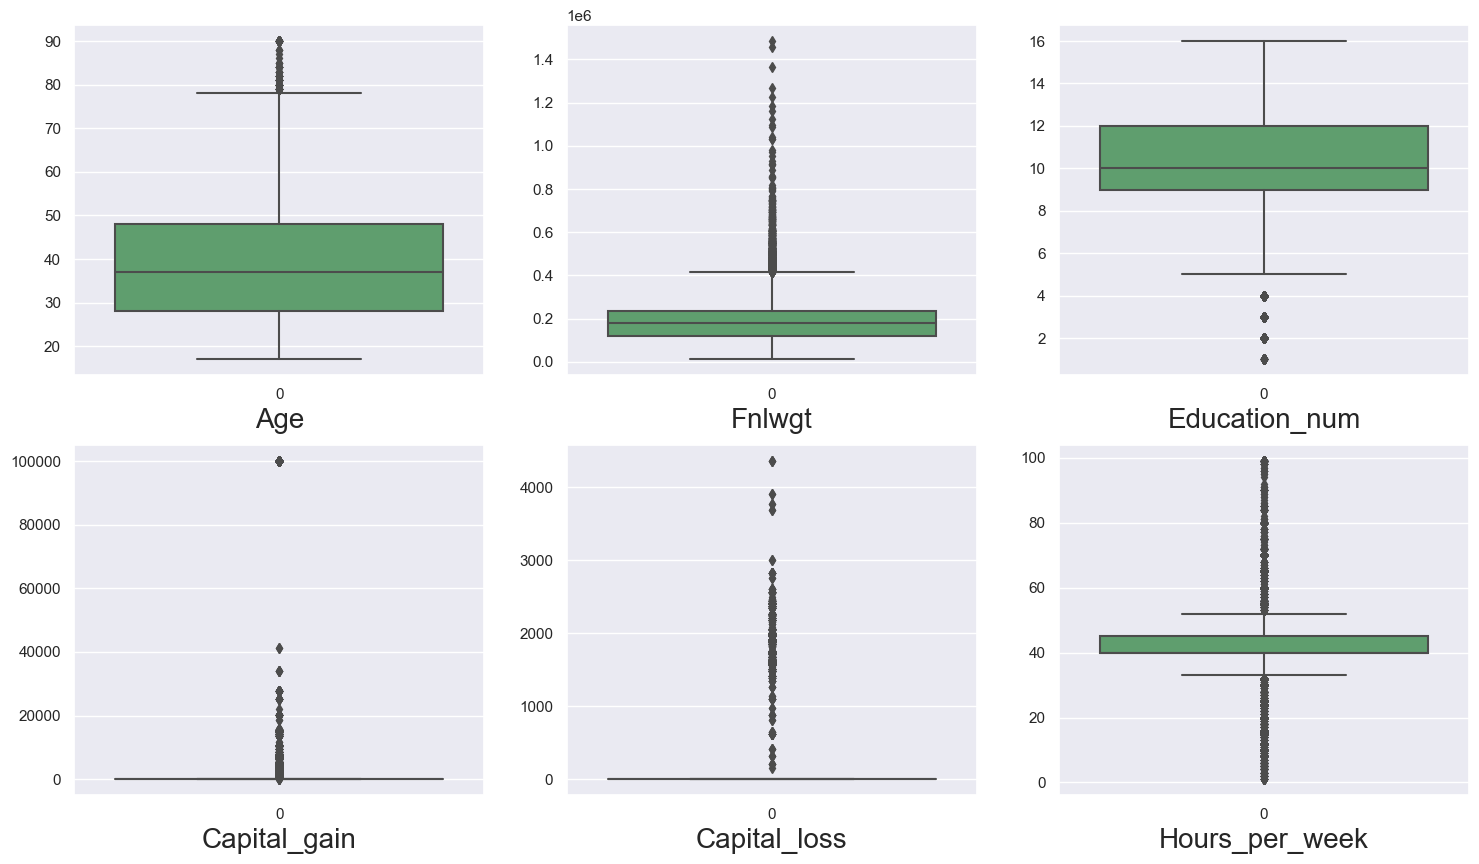

In [36]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Our examination of the data reveals the presence of outliers in the datasets.

In [37]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (32560, 16)
Shape of the dataframe after removing outliers:  (27783, 16)
Percentage of data loss post outlier removal:  14.67137592137592


Our data cleaning process incurs a data loss of 13.75%. While this represents a significant portion, the ample number of remaining data points within the dataset allows for its mitigation in the context of machine learning model development.  Two outlier treatment methods are under consideration: quantile-based and z-score based.  While the quantile method is an option, a visual inspection of the boxplot suggests that applying a lower cap could result in the exclusion of valuable data, potentially exceeding the data loss associated with the z-score method.  Therefore, the z-score approach appears to be the more favorable strategy for outlier treatment in this instance.

In [38]:
df.skew()

Age                0.484815
Workclass          1.183376
Fnlwgt             0.627839
Education         -0.955830
Education_num     -0.146241
Marital_status    -0.045497
Occupation         0.135730
Relationship       0.752998
Race              -2.587270
Sex               -0.688841
Capital_gain       4.930962
Capital_loss      29.521477
Hours_per_week    -0.359723
Native_country    -5.179023
Income             1.323412
age_group          0.778661
dtype: float64

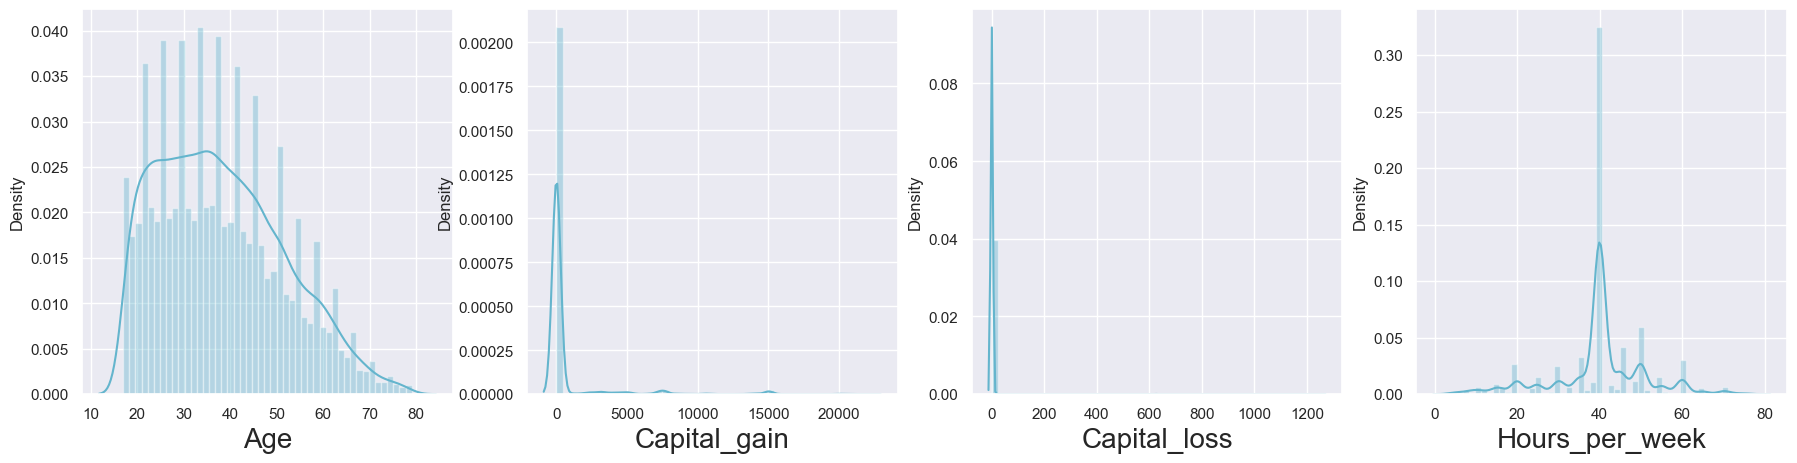

In [39]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in df[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='c')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

- Categorical variables (Relationship, Sex, etc.) show skewness, but this doesn't impact them directly. Consider alternative methods (imbalance handling, encoding) for machine learning models.
- Numeric variables (Capital_gain, Capital_loss) have skewness due to zeros and high values. Transformation may not eliminate it entirely. Evaluate its impact on the chosen machine learning model before applying.

In [40]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
Age,1.000000,0.042922,-0.077599,-0.004169,0.044412,-0.286278,0.006079,-0.270166,0.020938,0.089335,0.132382,0.023449,0.090928,0.035239,0.241315,0.708782
Workclass,0.042922,1.000000,-0.017788,-0.020164,-0.060449,0.045782,0.308538,0.013567,0.032434,0.003105,-0.010394,-0.008177,-0.101597,0.005190,-0.060329,0.089529
Fnlwgt,-0.077599,-0.017788,1.000000,-0.021373,-0.039536,0.029752,-0.001255,0.014884,-0.102281,0.023202,-0.003621,0.003219,-0.018334,-0.103214,-0.011593,-0.071347
Education,-0.004169,-0.020164,-0.021373,1.000000,0.346929,-0.037125,-0.047034,-0.009196,0.026610,-0.031748,0.026581,-0.000335,0.058818,0.089093,0.070899,-0.183959
Education_num,0.044412,-0.060449,-0.039536,0.346929,1.000000,-0.058534,0.045515,-0.092873,0.082749,0.003945,0.157588,0.007352,0.155772,0.149067,0.319511,-0.104935
Marital_status,-0.286278,0.045782,0.029752,-0.037125,-0.058534,1.000000,0.054493,0.184104,-0.084671,-0.126149,-0.069569,-0.016479,-0.196905,-0.029891,-0.194068,-0.125418
Occupation,0.006079,0.308538,-0.001255,-0.047034,0.045515,0.054493,1.000000,-0.016552,-0.003834,0.030027,0.002079,-0.004665,-0.064224,0.019637,0.008354,0.064017
Relationship,-0.270166,0.013567,0.014884,-0.009196,-0.092873,0.184104,-0.016552,1.000000,-0.146470,-0.576884,-0.090011,0.030263,-0.263187,-0.012015,-0.247810,-0.124718
Race,0.020938,0.032434,-0.102281,0.026610,0.082749,-0.084671,-0.003834,-0.146470,1.000000,0.124862,0.031092,-0.000083,0.057038,0.014516,0.094940,0.026606
Sex,0.089335,0.003105,0.023202,-0.031748,0.003945,-0.126149,0.030027,-0.576884,0.124862,1.000000,0.069931,-0.027436,0.237000,-0.007392,0.211493,0.037170


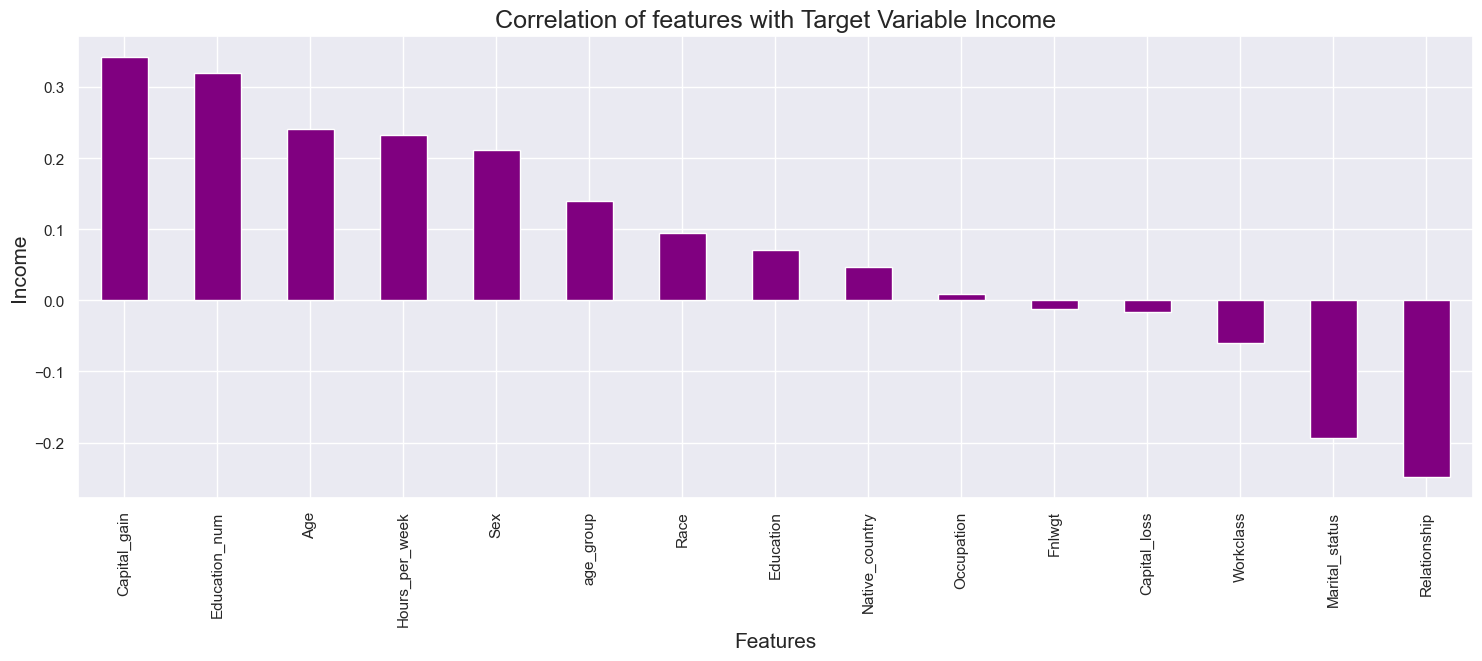

In [41]:
plt.figure(figsize = (18,6))
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Income',fontsize = 18)
plt.show()

#### as we see that capital_gain, education_num have positive correlation among the datasets, and relationship maritial_status have strong correlation between datasets

### 4. Checking Multicollinearity between features using variance_inflation_factor

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,21.793345,Age
1,6.242900,Workclass
2,4.734709,Fnlwgt
3,9.738038,Education
4,24.341499,Education_num
5,4.401791,Marital_status
6,3.548226,Occupation
7,2.951749,Relationship
8,36.730035,Race
9,4.575786,Sex


Our analysis identifies the presence of multicollinearity within the data, characterized by moderate or weak correlations between most input features.  While a common approach to address multicollinearity involves removing highly correlated features, this strategy is not suitable in this case.  As an alternative solution, data scaling followed by Principal Component Analysis (PCA) can be employed.  Data scaling helps to mitigate the influence of features with large scales, while PCA facilitates the identification and extraction of uncorrelated principal components that capture the essential information from the original features.

### 5. Balanceing Imbalanced target feature

In [43]:
df.Income.value_counts()

Income
0    21557
1     6226
Name: count, dtype: int64

#### Balancing using SMOTE

In [44]:
X = df.drop(['Income'], axis =1)
Y = df['Income']

In [45]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [46]:
Y.value_counts()

Income
0    21557
1    21557
Name: count, dtype: int64

Our data preprocessing efforts have effectively addressed the class imbalance issue.  All categories within the dataset now exhibit a balanced representation.  This mitigation strategy helps to ensure that the machine learning model avoids biasing its predictions towards any particular category, leading to a more robust and generalizable model.

### Standard Scaling

In [47]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

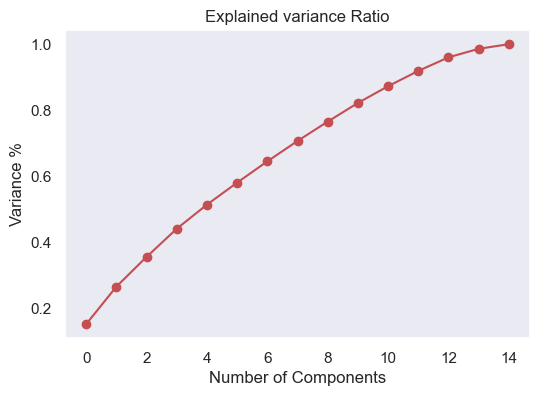

In [48]:
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

- PCA analysis shows the first 9 components capture 90% of data variation.
- We'll use these 9 components as features in our model for better performance and efficiency (by reducing redundancy).

In [49]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [50]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (30179, 9)
Training target vector size: (30179,)
Test feature matrix size: (12935, 9)
Test target vector size: (12935,)


### Finding best Random state

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7754928488596831 on Random_state 174


In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=237, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.770622342481639


Confusion matrix of Logistics Regression : 
 [[4984 1628]
 [1339 4984]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      6612
           1       0.75      0.79      0.77      6323

    accuracy                           0.77     12935
   macro avg       0.77      0.77      0.77     12935
weighted avg       0.77      0.77      0.77     12935



### Finding Optimal value of n_neighbors for KNN

In [54]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] 
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,y_pred))
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4102475517662347
RMSE value for k=  2 is: 0.4347666422842704
RMSE value for k=  3 is: 0.4033106136734591
RMSE value for k=  4 is: 0.4120339022533309
RMSE value for k=  5 is: 0.39926488306590746
RMSE value for k=  6 is: 0.40646115279108364
RMSE value for k=  7 is: 0.39965195526836356
RMSE value for k=  8 is: 0.40474571705873175
RMSE value for k=  9 is: 0.4032147585054568
RMSE value for k=  10 is: 0.40398096301311076
RMSE value for k=  11 is: 0.4035022556959983
RMSE value for k=  12 is: 0.4043635208289611


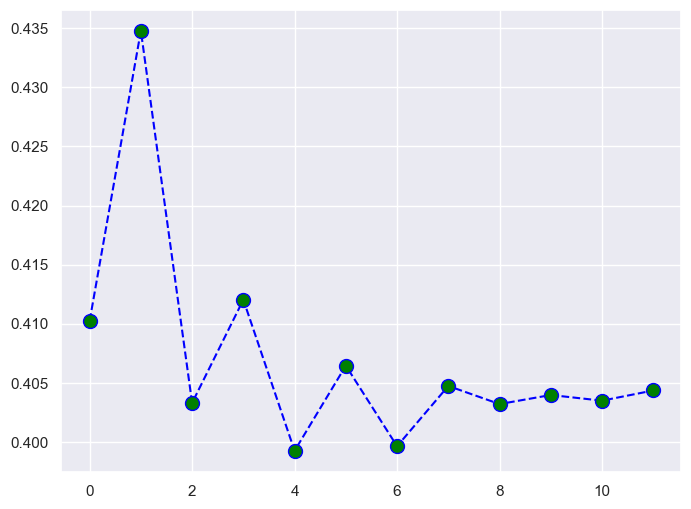

In [55]:
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

At k=3, we get the minimum RMSE value which approximately 0.401966561234869 , and shoots up on further increasing the k value. We can safely say that k=3 will give us the best result in this case

### Applying other classification algorithm

In [56]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('-'*100)

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.770622342481639


Confusion matrix : 
 [[4984 1628]
 [1339 4984]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      6612
           1       0.75      0.79      0.77      6323

    accuracy                           0.77     12935
   macro avg       0.77      0.77      0.77     12935
weighted avg       0.77      0.77      0.77     12935



----------------------------------------------------------------------------------------------------
Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8314650173946656


Confusion matrix : 
 [[5036 1576]
 [ 604 5719]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      6612
           1       0.78      0.90      0.84      6323

    accuracy                           0.83     

## CrossValidation :

In [57]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('-'*150)



Cross Validation Score LogisticRegression() :

Score : [0.75646527 0.76875797 0.76295953 0.76759828 0.77511018]
Mean Score : 0.7661782467861127
Std deviation : 0.006215353711133157


------------------------------------------------------------------------------------------------------------------------------------------------------


Cross Validation Score SVC() :

Score : [0.7958947  0.82627856 0.83996289 0.83857126 0.84029228]
Mean Score : 0.8281999371976244
Std deviation : 0.016967475583050756


------------------------------------------------------------------------------------------------------------------------------------------------------


Cross Validation Score GaussianNB() :

Score : [0.69001508 0.72109475 0.73269164 0.74231706 0.73706797]
Mean Score : 0.724637297181159
Std deviation : 0.01867198854569201


------------------------------------------------------------------------------------------------------------------------------------------------------


Cross Validatio

In [58]:
parameter= {'criterion' : ['gini', 'entropy'],'min_samples_split':[3,5,8],'max_depth' : [20,30,40],'n_estimators' : [100, 150, 200]}

In [59]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.837 total time=   2.1s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.834 total time=   2.7s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.838 total time=   2.3s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.838 total time=   2.3s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [60]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'min_samples_split': 5,
 'n_estimators': 200}

## Final Model

In [61]:
Final_mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 200, max_depth=30 ,min_samples_split= 3)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8511789717819869


## Saving model

In [62]:
import joblib
joblib.dump(Final_mod,'Census_Income_Final.pkl')

['Census_Income_Final.pkl']